## 4c. Calculate pure solubility of CO2 and H2O

## Setting things up
You need to install VolFe once on your machine, if you haven't yet. Then we need to import a few Python packages (including VolFe). 

In [1]:
# Install VolFe on your machine. Don't remove the # from this line!
# pip install VolFe # Remove the first # in this line if you have not installed VolFe on your machine before.

# import python packages
import pandas as pd
import matplotlib.pyplot as plt
import VolFe as vf

This allows you to calculate the pure solubility for H2O and CO2 for a given melt composition.

In [2]:
# Define the melt composition, fO2 estimate, and T as a dictionary.
my_analysis = {'Sample':'Sari15-04-33',
           'T_C': 1200., # Temperature in 'C
           'SiO2': 47.89, # wt%
           'TiO2': 0.75, # wt%
           'Al2O3': 16.74, # wt%
           'FeOT': 9.43, # wt%
           'MnO': 0.18, # wt%
           'MgO': 5.92, # wt%
           'CaO': 11.58, # wt%
           'Na2O': 2.14, # wt%
           'K2O': 0.63, # wt%
           'P2O5': 0.17, # wt%
           'Fe3FeT': 0.195,
           'initial_P': 5000.} # bar

# Turn the dictionary into a pandas dataframe, setting the index to 0.
my_analysis = pd.DataFrame(my_analysis, index=[0])

We'll use the default options

In [3]:
# print default options in VolFe
print(vf.default_models)

                            option
type                              
COH_species     yes_H2_CO_CH4_melt
H2S_m                         True
species X                       Ar
Hspeciation                   none
fO2                       Kress91A
...                            ...
error                          0.1
print status                 False
output csv                    True
setup                        False
high precision               False

[78 rows x 1 columns]


And this runs the calculation

In [4]:
pure_sol1 = vf.calc_pure_solubility(my_analysis)

And we can change the solubility models...

In [5]:
# choose the options I want - everything else will use the default options
my_models = [['water','Rhyolite_HughesIP'],['carbon dioxide','Rhyolite_Blank93']]

# turn to dataframe with correct column headers and indexes    
my_models = vf.make_df_and_add_model_defaults(my_models)

# run calculations
pure_sol2 = vf.calc_pure_solubility(my_analysis,models=my_models)

And we can plot them

(5000.0, 0.0)

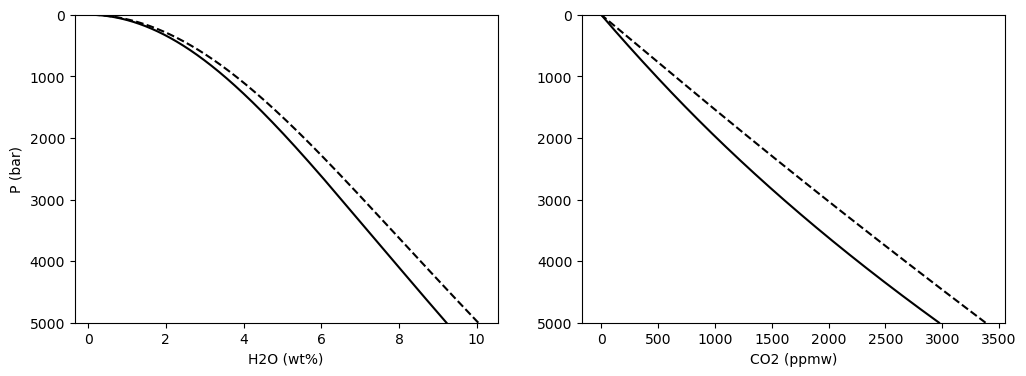

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

data1 = pure_sol1 # basalt
data2 = pure_sol2 # rhyolite

# Plotting results
ax1.plot(data1['H2O_wtpc'], data1['P_bar'], '-k')
ax1.plot(data2['H2O_wtpc'], data2['P_bar'], '--k')
ax2.plot(data1['CO2_ppmw'], data1['P_bar'], '-k')
ax2.plot(data2['CO2_ppmw'], data2['P_bar'], '--k')

ax1.set_ylabel('P (bar)')
ax1.set_xlabel('H2O (wt%)')
ax2.set_xlabel('CO2 (ppmw)')
ax1.set_ylim([5000,0])
ax2.set_ylim([5000,0])